<a href="https://colab.research.google.com/github/NehalNN10/Deep_Learning_Project_Fall_25/blob/main/DW_npy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data using pandas or another library
import pandas as pd
import numpy as np
import os

In [ ]:
# Please provide the path to your file in Google Drive below
# For example: file_path = '/content/drive/MyDrive/my_folder/my_file.csv'
file_path = '/content/drive/MyDrive/EarthEngineExports/DW'

#output
out_csv_files = [f for f in os.listdir(file_path) if f.endswith('.csv')]
# Read each file and store DataFrames in a list
out_csv_files.sort()
out_csv_files = out_csv_files[-11:]

out_dfs = [pd.read_csv(os.path.join(file_path, f)) for f in out_csv_files]

# Concatenate all DataFrames
out_combined_df = pd.concat(out_dfs, ignore_index=True)

In [ ]:
out_combined_df = out_combined_df.drop(out_combined_df.columns[[0, 7, 8, 11]], axis=1)
out_combined_df = out_combined_df.reset_index(drop=True)

In [ ]:
out_combined_df = out_combined_df[['date', 'tile_x', 'tile_y'] + \
    [c for c in out_combined_df if c not in ['date', 'tile_x', 'tile_y']]]
out_combined_df.head()

,date,tile_x,tile_y,bare,built,crops,flooded_vegetation,grass,shrub_and_scrub,snow_and_ice,trees,water,.geo
0,2015_06_02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Polygon"",""coordinates"":[[[67.84824628..."
1,2015_06_02,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Polygon"",""coordinates"":[[[67.94824628..."
2,2015_06_02,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Polygon"",""coordinates"":[[[68.04824628..."
3,2015_06_02,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Polygon"",""coordinates"":[[[68.14824628..."
4,2015_06_02,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""type"":""Polygon"",""coordinates"":[[[68.24824628..."


In [ ]:
out_df_final = out_combined_df.drop(out_combined_df.columns[[-1]], axis=1)
out_df_final.head()

In [ ]:
classes = ['bare','built','crops','flooded_vegetation',
           'grass','shrub_and_scrub','snow_and_ice','trees','water']

out_df_final['date'] = pd.to_datetime(out_df_final['date'], format='%Y_%m_%d')


# Create copy for mask
mask_valid = out_df_final[classes].notna().any(axis=1).astype(int)
out_df_final['mask_valid'] = mask_valid

In [ ]:
out_df_final[classes] = out_df_final.groupby(['tile_x','tile_y'])[classes].transform(
    lambda g: g.interpolate(limit_direction='both', method='linear')
)

# Step 2: spatial (only for remaining NaN)
out_df_final[classes] = out_df_final.groupby('date')[classes].transform(
    lambda g: g.fillna(g.mean())
)

In [ ]:
out_df_final[classes].isna().sum()

,0
bare,0
built,0
crops,0
flooded_vegetation,0
grass,0
shrub_and_scrub,0
snow_and_ice,0
trees,0
water,0


In [ ]:
print('Output: ' + str(out_df_final.shape))
out_df_final.head()

Output: (2890272, 13)


,date,tile_x,tile_y,bare,built,crops,flooded_vegetation,grass,shrub_and_scrub,snow_and_ice,trees,water,mask_valid
0,2015-06-02,0.0,0.0,0.045197,0.024577,0.031092,0.038155,0.029219,0.030064,0.029877,0.034842,0.735564,0
1,2015-06-02,1.0,0.0,0.105449,0.030314,0.037140,0.073564,0.042972,0.049754,0.041510,0.036678,0.567071,0
2,2015-06-02,2.0,0.0,0.132776,0.033016,0.048989,0.149024,0.053143,0.065559,0.042892,0.045911,0.388977,0
3,2015-06-02,3.0,0.0,0.139262,0.032583,0.049661,0.138330,0.056876,0.071072,0.042613,0.046630,0.385593,0
4,2015-06-02,4.0,0.0,0.111349,0.033477,0.057291,0.169893,0.068535,0.074561,0.041779,0.049893,0.349260,0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tile_x'].plot(kind='hist', bins=20, title='tile_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bare'].plot(kind='hist', bins=20, title='bare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['built'].plot(kind='hist', bins=20, title='built')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='tile_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='tile_x', y='bare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='bare', y='built', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='built', y='crops', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['bare']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('bare')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['built']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('built')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['flooded_vegetation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('flooded_vegetation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['snow_and_ice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('snow_and_ice')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['tile_x'].plot(kind='line', figsize=(8, 4), title='tile_x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['bare'].plot(kind='line', figsize=(8, 4), title='bare')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['built'].plot(kind='line', figsize=(8, 4), title='built')
plt.gca().spines[['top', 'right']].set_visible(False)

# Data Shape

In [ ]:
out_classes = [
    'bare', 'built', 'crops', 'flooded_vegetation',
    'grass', 'shrub_and_scrub', 'snow_and_ice', 'trees', 'water'
]

dates = sorted(out_df_final['date'].unique())  # assuming same dates as X
Y = []

for d in dates:
    slice_df = out_df_final[out_df_final['date'] == d]
    pivoted = slice_df.pivot(index='tile_y', columns='tile_x', values=out_classes)
    arr = np.stack([pivoted[c].values for c in out_classes], axis=-1)
    Y.append(arr)

Y = np.stack(Y)  # final tensor (476, 69, 88, 9)
print("Y shape:", Y.shape)

# Save the tensor to a file in your Google Drive
save_path = '/content/drive/MyDrive/EarthEngineExports/DW_data.npy'
np.save(save_path, Y)
print(f"Tensor saved to {save_path}")

Y shape: (476, 69, 88, 9)
Tensor saved to /content/drive/MyDrive/EarthEngineExports/DW/interpolated_data.npy


# Example Data Loading

In [ ]:
import numpy as np

# Specify the path to your saved tensor file
load_path = '/content/drive/MyDrive/EarthEngineExports/DW_data.npy'

# Load the tensor from the file
loaded_Y = np.load(load_path)

# You can now use loaded_Y, which is your tensor data
print("Loaded tensor shape:", loaded_Y.shape)

Loaded tensor shape: (476, 69, 88, 9)


# Data Distribution

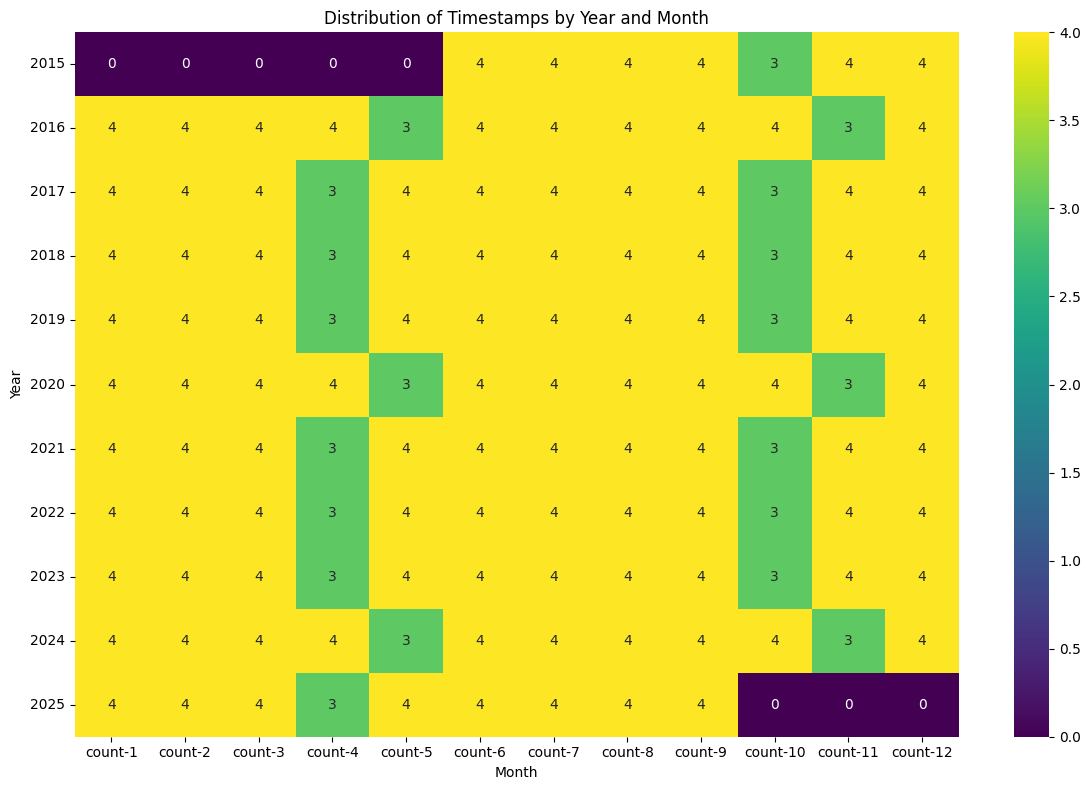

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'dates' is a list of datetime objects from previous steps

# Create a list of (year, month) tuples
year_month = [(date.year, date.month) for date in dates]

# Count the occurrences of each (year, month) combination
from collections import Counter
counts = Counter(year_month)

# Create a DataFrame for the heatmap
heatmap_data = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
heatmap_data.index = pd.MultiIndex.from_tuples(heatmap_data.index, names=['year', 'month'])
heatmap_data = heatmap_data.unstack(level='month').fillna(0)

# Ensure all months are present as columns, even if count is 0
all_months = range(1, 13)
heatmap_data = heatmap_data.reindex(columns=all_months, level='month').fillna(0)


# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis')
plt.title('Distribution of Timestamps by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

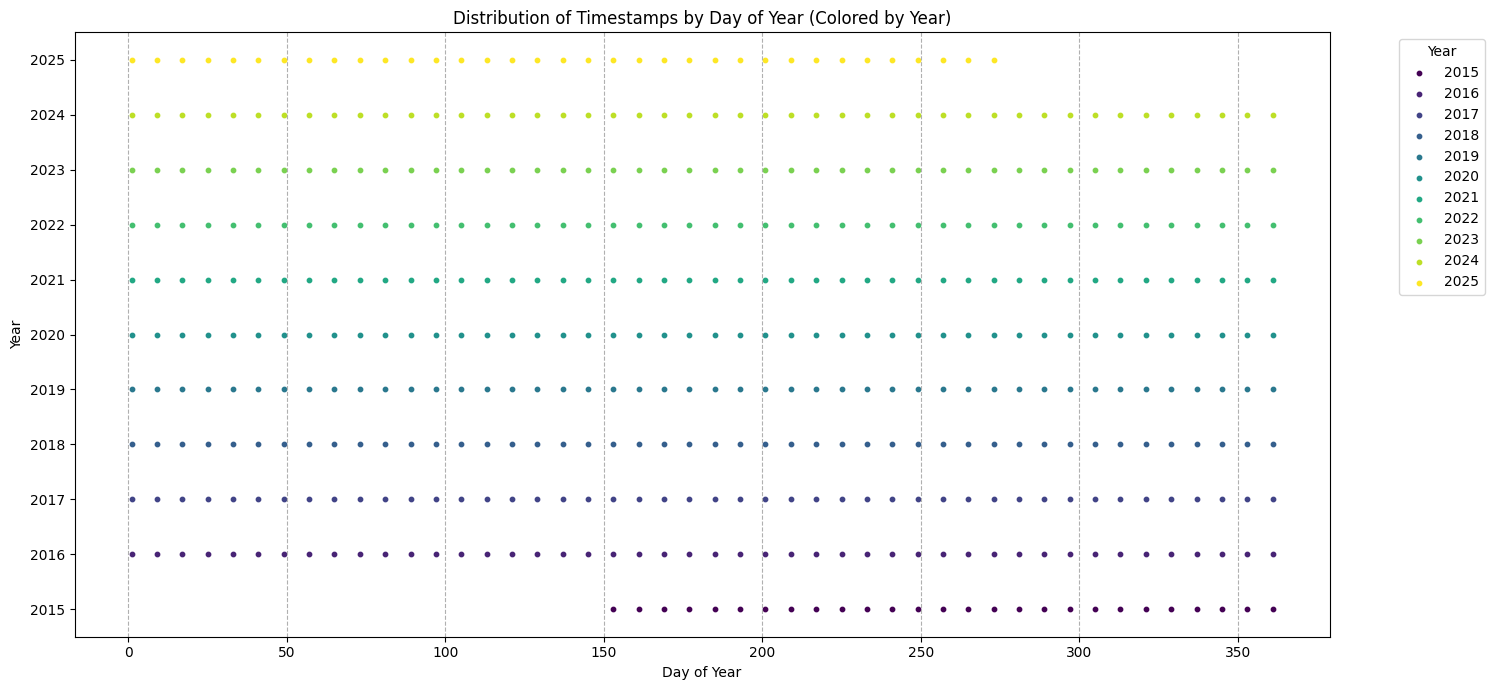

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import numpy as np

# Assuming 'dates' is a list of datetime objects from previous steps

# Extract day of the year and year
day_of_year = [date.timetuple().tm_yday for date in dates]
years = [date.year for date in dates]

# Create a colormap based on the number of unique years
unique_years = sorted(list(set(years)))
colors = cm.viridis(np.linspace(0, 1, len(unique_years)))
year_color_map = {year: colors[i] for i, year in enumerate(unique_years)}

# Plot the distribution of timestamps by day of the year, colored by year
plt.figure(figsize=(15, 7))
for i, year in enumerate(unique_years):
    year_dates_doy = [doy for doy, y in zip(day_of_year, years) if y == year]
    plt.scatter(year_dates_doy, [year] * len(year_dates_doy), color=year_color_map[year], label=year, s=10)

plt.title('Distribution of Timestamps by Day of Year (Colored by Year)')
plt.xlabel('Day of Year')
plt.ylabel('Year')
plt.yticks(unique_years) # Set y-ticks to be the unique years
plt.grid(True, axis='x', linestyle='--')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()